
# Задание 3_2

Задание (новое)
1. Ужасные новости! Ваш руководитель объявил четверг офисным днем! К такому вы явно не были готовы, однако ничего не
поделаешь, придется отряхнуть давно запылившийся рюкзак и ехать, заодно и с командой можно будет познакомиться. По прибытии в офис вы обнаруживаете, что все ваши коллеги только и делают, что говорят о каких-то биткоинах, криптовалютах, блокчейне и прочем. Вам эти слова, конечно же, знакомы, однако чтобы «быть в теме», вы решили самостоятельно погрузиться в суть вещей. Как истинный разработчик вы нашли на просторах Интернета особый ресурс, который позволяет в любой момент времени получить настоящий курс почти любой криптовалюты. Адрес этого ресурса: 

Exchangerate.host - Unlimited & Free foreign, crypto exchange rates with currency conversion & EU VAT rates API 

А тут как раз совсем недавно также, повинуясь модным тенденциям, вы начали изучать Python и теперь готовы не просто
«быть в теме», а еще и впечатлить ваших коллег!

Вам необходимо заполучить данные о курсе биткоина (BTC) к рублю (RUB) за последний месяц.

p.s. Месяц должен быть именно календарным, но любым, не обязательно привязываться к текущему месяцу, можно взять, например,
январь или август прошлого года.

2. Но эти данные важно не просто получить, а еще и проанализировать! Но чтобы проанализировать, вам необходимо их
куда-нибудь записать. И тут на помощь приходят ваши умения работать с СУБД Postgres. Вы решили, что будет круто создать
таблицу, в которой будет отражены id значения, дата измерения, первая валюта, вторая валюта и непосредственно сам курс.
Попробуйте с помощью средств языка Python перенести данные, которые вы получите на прошлом шаге, в таблицу СУБД Postgres.

p.s. Таблица может как быть заранее созданной, так и быть созданной в рамках того же python-скрипта

3. Отлично, теперь у нас прекрасная табличка с данными об отношении курса биткоина к рублю за целый месяц. 
Теперь давайте решим главную задачу — впечатлим коллег! Используя средства языка Python, подключитесь к недавно
созданной таблице и рассчитайте:

день, в который значение курса было максимальным,

день, в который значение курса было минимальным,

максимальное значение курса,

минимальное значение курса,

среднее значение курса за весь месяц,

значение курса на последний день месяца.

И тут также важно использовать ваши навыки работы с базами данных. Создайте новую таблицу, где будет всего одна строка,
но зато какая! Перенесите все рассчитанные показатели в эту таблицу, а также добавьте столбцы с информацией о валютах
и месяце, за который производился расчет. 
 

В качестве результата предоставьте python-скрипт, который реализует описанную выше логику.

По итогу выполнения всех пунктов задания вам необходимо прислать ссылку на ваш репозиторий.


# Решение

## 1. Курс Биткоина к рублю за последний месяц.


                    Rate
2023-06-01  2.180140e+06
2023-06-02  2.219636e+06
2023-06-03  2.164137e+06
2023-06-04  2.216854e+06
2023-06-05  2.060827e+06
2023-06-06  2.231097e+06
2023-06-07  2.128601e+06
2023-06-08  2.157652e+06
2023-06-09  2.168827e+06
2023-06-10  2.117741e+06
2023-06-11  2.167889e+06
2023-06-12  2.147162e+06
2023-06-13  2.157307e+06
2023-06-14  2.116073e+06
2023-06-15  2.125447e+06
2023-06-16  2.188508e+06
2023-06-17  2.241900e+06
2023-06-18  2.228307e+06
2023-06-19  2.239579e+06
2023-06-20  2.372939e+06
2023-06-21  2.572692e+06
2023-06-22  2.397150e+06
2023-06-23  2.565455e+06
2023-06-24  2.565470e+06
2023-06-25  2.552462e+06
2023-06-26  2.557698e+06
2023-06-27  2.598582e+06
2023-06-28  2.606767e+06
2023-06-29  2.622276e+06
2023-06-30  2.693521e+06


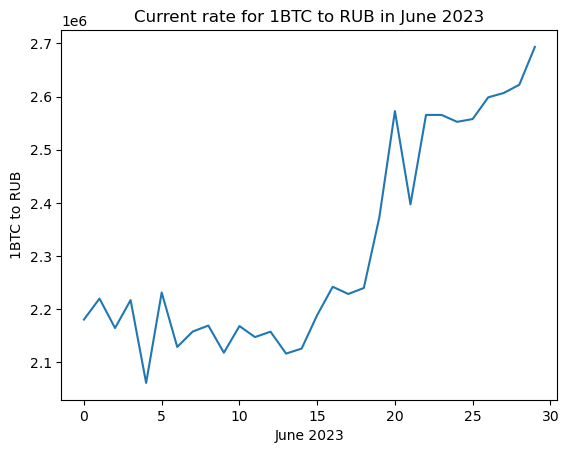

In [52]:
# Часть 1 задания 3_2
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

def get_rates(amount, currency, converted_currency):
    
   
    # Запрос
    url = f'https://api.exchangerate.host/timeseries'
    payload = {'base': currency, 'amount': amount, 'start_date': '2023-06-01',
              'end_date': '2023-06-30'}
    response = requests.get(url, params=payload)
    data = response.json()
    
    #Создание словаря для хранения значений
    currency_history = {}
    rate_history_array = []
    
    for item in data['rates']:
        current_date = item
        currency_rate = data['rates'][item][converted_currency]
        
        currency_history[current_date] = [currency_rate]
        rate_history_array.append(currency_rate)
        
    
    # Значения
    pd_data = pd.DataFrame(currency_history).transpose()
    pd_data.columns = ['Rate']
    pd.set_option('display.max_rows', None)
    print(pd_data)
    
    # Отображение графика
    plt.plot(rate_history_array)
    plt.ylabel(f'{amount}{currency} to {converted_currency}')
    plt.xlabel('June 2023')
    plt.title(f'Current rate for {amount}{currency} to {converted_currency} in June 2023')
    plt.show()
        
get_rates(1, 'BTC', 'RUB')

## 2. Запись данных в базу данных

In [53]:
import psycopg2

In [54]:
#База данных предварительно создана.

db_connection = psycopg2.connect(dbname='currency',
                                 user='postgres',
                                 password='postgres',
                                 host='localhost',
                                 port=5435)

print("Successfully connected to the database.")
cur = db_connection.cursor()
values = [('2023-06-01', 'BTC', 'RUB', 2.180140e+06),
          ('2023-06-02', 'BTC', 'RUB', 2.219636e+06),
          ('2023-06-03', 'BTC', 'RUB', 2.164137e+06),
          ('2023-06-04', 'BTC', 'RUB', 2.216854e+06),
          ('2023-06-05', 'BTC', 'RUB', 2.060827e+06),
          ('2023-06-06', 'BTC', 'RUB', 2.231097e+06),
          ('2023-06-07', 'BTC', 'RUB', 2.128601e+06),
          ('2023-06-08', 'BTC', 'RUB', 2.157652e+06),
          ('2023-06-09', 'BTC', 'RUB', 2.168827e+06),
          ('2023-06-10', 'BTC', 'RUB', 2.117741e+06),
          ('2023-06-11', 'BTC', 'RUB', 2.167889e+06),
          ('2023-06-12', 'BTC', 'RUB', 2.147162e+06),
          ('2023-06-13', 'BTC', 'RUB', 2.157307e+06),
          ('2023-06-14', 'BTC', 'RUB', 2.116073e+06),
          ('2023-06-15', 'BTC', 'RUB', 2.125447e+06),
          ('2023-06-16', 'BTC', 'RUB', 2.188508e+06),
          ('2023-06-17', 'BTC', 'RUB', 2.241900e+06),
          ('2023-06-18', 'BTC', 'RUB', 2.228307e+06),
          ('2023-06-19', 'BTC', 'RUB', 2.239579e+06),
          ('2023-06-20', 'BTC', 'RUB', 2.372939e+06),
          ('2023-06-21', 'BTC', 'RUB', 2.572692e+06),
          ('2023-06-22', 'BTC', 'RUB', 2.397150e+06),
          ('2023-06-23', 'BTC', 'RUB', 2.565455e+06),
          ('2023-06-24', 'BTC', 'RUB',  2.565470e+06),
          ('2023-06-25', 'BTC', 'RUB',  2.552462e+06),
          ('2023-06-26', 'BTC', 'RUB',  2.557698e+06),
          ('2023-06-27', 'BTC', 'RUB',  2.598582e+06),
          ('2023-06-28', 'BTC', 'RUB',  2.606767e+06),
          ('2023-06-29', 'BTC', 'RUB',  2.622276e+06),
          ('2023-06-30', 'BTC', 'RUB',  2.693521e+06)]
args = ','.join(cur.mogrify("(%s,%s,%s,%s)",i).decode('utf-8')
                for i in values)

cur.execute("INSERT INTO currency (date, first_currency, second_currency, current_rate) VALUES " + (args))
db_connection.commit() # Без этой команды в DBeather не увидишь, что обновились данные

Successfully connected to the database.


In [55]:
cur.execute("Select * from currency")
res = cur.fetchall()

In [56]:
df = pd.DataFrame(res, columns = ('id', 'date', 'first_currency', 'second_currency', 'current_rate'))

In [57]:
df

,id,date,first_currency,second_currency,current_rate
0,1,2023-06-01,BTC,RUB,2180140.00
1,2,2023-06-02,BTC,RUB,2219636.00
2,3,2023-06-03,BTC,RUB,2164137.00
3,4,2023-06-04,BTC,RUB,2216854.00
4,5,2023-06-05,BTC,RUB,2060827.00
5,6,2023-06-06,BTC,RUB,2231097.00
6,7,2023-06-07,BTC,RUB,2128601.00
7,8,2023-06-08,BTC,RUB,2157652.00
8,9,2023-06-09,BTC,RUB,2168827.00
9,10,2023-06-10,BTC,RUB,2117741.00


In [58]:
# Закрытие курсора и соединения после окончания работы с базой.
cur.close()
db_connection.close()

## 3. Рассчет значений:

#### - день, в который значение курса было максимальным

In [59]:
day_max_curs = df[df['current_rate']==df['current_rate'].max()]

In [60]:
print(day_max_curs['date'])

29    2023-06-30
Name: date, dtype: object


#### - день, в который значение курса было минимальным

In [61]:
day_min_curs = df[df['current_rate']==df['current_rate'].min()]
print(day_min_curs['date'])

4    2023-06-05
Name: date, dtype: object


#### - максимальное значение курса

In [62]:
max_curs = df['current_rate'].max()
print(max_curs)

2693521.00


#### - минимальное значение курса

In [63]:
min_curs = df['current_rate'].min()
print(min_curs)

2060827.00


#### среднее значение курса за весь месяц

In [64]:
mean_curs = round(df['current_rate'].mean(),2)
print(mean_curs)

2312089.87


#### - значение курса на последний день месяца


In [65]:
df.dtypes
#df['Month_End'] = df.index.is_month_end
#sample = df[df['Month_End'] == 1]

id                  int64
date               object
first_currency     object
second_currency    object
current_rate       object
dtype: object

In [66]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [67]:
df.dtypes

id                          int64
date               datetime64[ns]
first_currency             object
second_currency            object
current_rate               object
dtype: object

In [68]:
last_day_curs = df.sort_values(by='date').groupby(df.date.dt.to_period('M')).last().set_index('date')
print(last_day_curs['current_rate'])

date
2023-06-30    2693521.00
Name: current_rate, dtype: object


### Объединение полученных значений в новый датафрейм.


In [69]:
day_max_curs

,id,date,first_currency,second_currency,current_rate
29,30,2023-06-30,BTC,RUB,2693521.00


In [70]:
day_max_curs = day_max_curs[['first_currency','second_currency','date','current_rate']]

In [71]:
day_max_curs

,first_currency,second_currency,date,current_rate
29,BTC,RUB,2023-06-30,2693521.00


In [72]:
day_max_curs.columns = ['first_currency','second_currency','date_max_curse','max_curse']
day_max_curs

,first_currency,second_currency,date_max_curse,max_curse
29,BTC,RUB,2023-06-30,2693521.00


In [73]:
day_max_curs.reset_index(drop = True, inplace = True)
day_max_curs

,first_currency,second_currency,date_max_curse,max_curse
0,BTC,RUB,2023-06-30,2693521.00


In [74]:
day_min_curs

,id,date,first_currency,second_currency,current_rate
4,5,2023-06-05,BTC,RUB,2060827.00


In [75]:
day_min_curs = day_min_curs[['date','current_rate']]

In [76]:
day_min_curs

,date,current_rate
4,2023-06-05,2060827.00


In [77]:
day_min_curs.columns = ['date_min_curse', 'min_curse']
day_min_curs

,date_min_curse,min_curse
4,2023-06-05,2060827.00


In [78]:
day_min_curs.reset_index(drop = True, inplace = True)
day_min_curs

,date_min_curse,min_curse
0,2023-06-05,2060827.00


In [79]:
mean_curs = pd.DataFrame([mean_curs], columns = ['mean_curs'])
mean_curs

,mean_curs
0,2312089.87


In [80]:

result = pd.concat([day_max_curs, day_min_curs, mean_curs], axis = 1, ignore_index=True)
result.columns =  ['first_currency','second_currency','date_max_curse','max_curse','date_min_curse', 'min_curse', 'mean_curs']

In [81]:
result

,first_currency,second_currency,date_max_curse,max_curse,date_min_curse,min_curse,mean_curs
0,BTC,RUB,2023-06-30,2693521.00,2023-06-05,2060827.00,2312089.87


In [82]:
result.dtypes

first_currency      object
second_currency     object
date_max_curse      object
max_curse           object
date_min_curse      object
min_curse           object
mean_curs          float64
dtype: object

In [83]:
result['date_max_curse'] = pd.to_datetime(result['date_max_curse'], format = '%Y-%m-%d')
result['date_min_curse'] = pd.to_datetime(result['date_min_curse'], format = '%Y-%m-%d')

In [84]:
result.dtypes

first_currency             object
second_currency            object
date_max_curse     datetime64[ns]
max_curse                  object
date_min_curse     datetime64[ns]
min_curse                  object
mean_curs                 float64
dtype: object

In [85]:
result['month'] = result['date_max_curse'].dt.month

In [86]:
result

,first_currency,second_currency,date_max_curse,max_curse,date_min_curse,min_curse,mean_curs,month
0,BTC,RUB,2023-06-30,2693521.00,2023-06-05,2060827.00,2312089.87,6


In [87]:
result.columns

Index(['first_currency', 'second_currency', 'date_max_curse', 'max_curse',
       'date_min_curse', 'min_curse', 'mean_curs', 'month'],
      dtype='object')

In [88]:
results = result[['first_currency', 'second_currency','month', 'date_max_curse', 'max_curse',
       'date_min_curse', 'min_curse', 'mean_curs']]
results

,first_currency,second_currency,month,date_max_curse,max_curse,date_min_curse,min_curse,mean_curs
0,BTC,RUB,6,2023-06-30,2693521.00,2023-06-05,2060827.00,2312089.87
